Enter the web address to get the essential words https://www.degruyter.com/document/doi/10.1515/cclm-2017-0287/html
How many essential words to print? 15


['model' 'data' 'ml' 'laboratori' 'predict' 'search' 'googl' 'test'
 'scholar' 'learn' 'machin' 'use' 'medicin' 'valu' 'evalu']


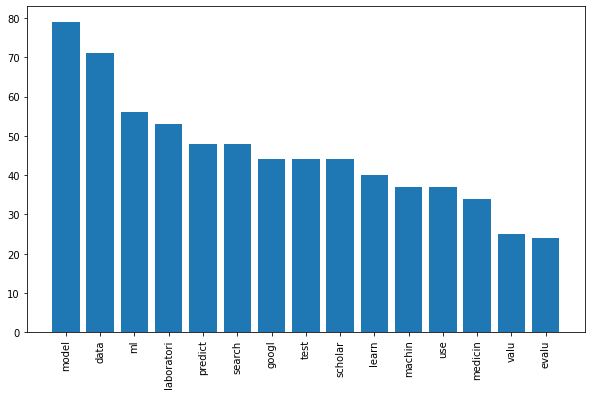

In [11]:
import nltk
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import string
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline

htmls = input('Enter the web address to get the essential words'),

def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x, 'lxml').find_all("p")
    return(x)

articles = [parse(url) for url in htmls]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]
articles = [re.sub('<.+?>', ' ', a) for a in articles]
articles = [re.sub('{.+?}', ' ', a) for a in articles]
articles = [re.sub('\n', ' ', a) for a in articles]
articles = [re.sub('\t', ' ', a) for a in articles]
articles = [a.lower() for a in articles]
#nltk.download()
articles = [nltk.word_tokenize(a) for a in articles]

stopwords = nltk.corpus.stopwords.words("english")

articles_new = [[word for word in a if (word not in stopwords)] for a in articles]

stemmer = nltk.PorterStemmer()
articles_new = [[stemmer.stem(word) for word in a] for a in articles_new]
articles_new = [" ".join(a) for a in articles_new]

punk_table = str.maketrans({key: None for key in string.punctuation})
articles_new = [a.translate(punk_table) for a in articles_new]

digits_table = str.maketrans({key: None for key in string.digits})
articles_new = [a.translate(digits_table) for a in articles_new]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit(articles_new)
arts_encoded = dtm.transform(articles_new)

k = int(input('How many essential words to print?'))
feature_names = np.array(dtm.get_feature_names())
for i in range(len(articles_new)):
    # sort the words in ascending order in terms of their occurrence and get their indices
    sorted_idxs = arts_encoded.getrow(i).todense().A.argsort().ravel()
    # take the best k and reverse the order
    best_idxs = sorted_idxs[-k:][::-1] # the fastest way to reverse the list
    # print the words corresponding to the indexes
    print(feature_names[best_idxs])
    
    # create graphs of the count of the most common words 
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names[best_idxs], arts_encoded.getrow(i).todense().A.ravel()[best_idxs])
    plt.xticks(rotation=90)
    
